In [1]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt

from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

### Definindo variáveis e contantes

In [2]:
from sympy import I

In [3]:
t, a = smp.symbols('t a', real=True)
a = 5

### Função

In [4]:
# Função x(t)
amplitudes_f_t = [2, 0.5]
frequencias_f_t = [1, 10]

x_t = 0
x_t += amplitudes_f_t[0] * smp.cos(frequencias_f_t[0]*2*np.pi*t)
x_t += amplitudes_f_t[1] * smp.cos(frequencias_f_t[1]*2*np.pi*t)
x_t

2*cos(6.28318530717959*t) + 0.5*cos(62.8318530717959*t)

## Transformada de Fourier

In [5]:
w = smp.symbols('w', real=True)

In [6]:
function_t = x_t * smp.exp(-I*w*t)
function_t

(2*cos(6.28318530717959*t) + 0.5*cos(62.8318530717959*t))*exp(-I*t*w)

In [7]:
result = smp.integrate(function_t, (t, 0, smp.oo))
result

Piecewise((0.000126651479552922*I*w/(1 - 0.000253302959105844*w**2) + 0.0506605918211689*I*w/(1 - 0.0253302959105844*w**2), Abs(2*arg(w) + pi) < pi), (Integral((2*cos(6.28318530717959*t) + 0.5*cos(62.8318530717959*t))*exp(-I*t*w), (t, 0, oo)), True))

### Plotagem

Tenta criar função a partir do Piecewise.

Caso não funcione, deve-se definir a função explicitamente na definição da função 'complex_function'

In [10]:
try:
    complex_function = smp.lambdify(w, result, 'numpy')

    # Tenta avaliar a função em um ponto específico
    y = complex_function(1)
except:
    # Define the function
    def complex_function(w):
        return 1 / (5 * ((1j * w / 5) + 1))

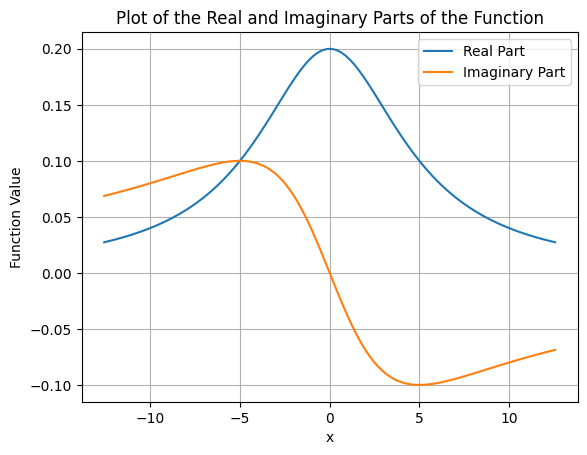

In [11]:
# Generate x-values
x = np.linspace(-2*2*np.pi, 2*2*np.pi, 100)

# Evaluate the real and imaginary parts of the function for each x-value
y_real = np.real(complex_function(x))
y_imag = np.imag(complex_function(x))

# Plot the real and imaginary parts of the function
plt.plot(x, y_real, label='Real Part')
plt.plot(x, y_imag, label='Imaginary Part')
plt.xlabel('x')
plt.ylabel('Function Value')
plt.title('Plot of the Real and Imaginary Parts of the Function')
plt.legend()
plt.grid(True)
plt.show()


## Outros exemplos

### Usando lambdify

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.symbols('x')
f = sp.Piecewise((sp.exp(-x), x < 0), (sp.cos(x), x >= 0))

# Converter a função Piecewise em uma função do Python
f_python = sp.lambdify(x, f, 'numpy')

# Avaliar a função em pontos específicos
x_vals = np.linspace(-2, 2, 100)
y_vals = f_python(x_vals)

In [ ]:
# Plot the function
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y(x)')
plt.grid(True)
plt.show()